Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

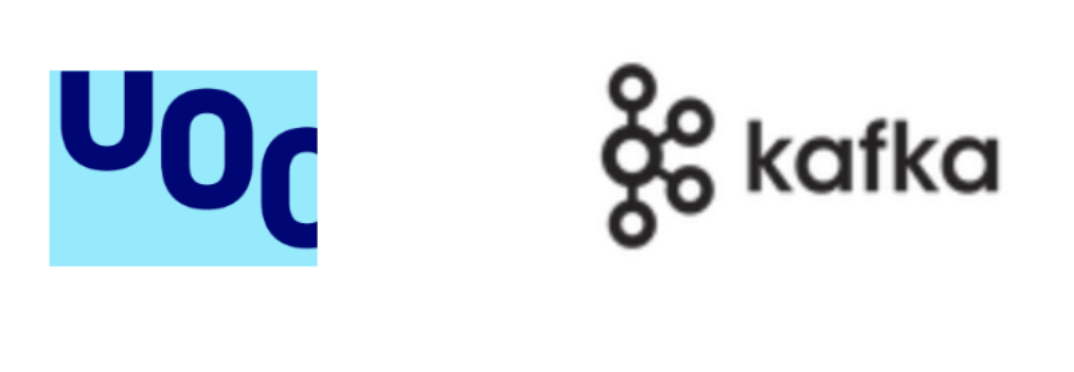

# Activitat: Captura i emmagatzematge: Kafka
## (Puntuació: 30% de l'Activitat Kafka)

**Nota**
En alguns dels exercicis s'hauran de fer **captures de pantalla que justifiquin les respostes**. Les captures de pantalla es poden fer amb les eines del sistema operatiu que estigueu utilitzant. Per copiar la imatge al porta-retalls podeu utilitzar diferents mètodes: "Eina de Talls" en Windows, "Imprimir pantalla", Ctrl+C en seleccionar una imatge, etc... Les imatges un cop capturades es poden enganxar directament a les cel·les de resposta, mitjançant Ctrl+V o amb el menú contextual que apareix amb el botó dret del ratolí, la qual cosa enganxarà la imatge que estigui al porta-retalls. Per veure la imatge, s'ha d'executar la cel·la.

# 1. Introducció

En aquesta activitat explorarem una altra de les tecnologies més importants en l'àmbit de l'anàlisi de dades en temps real: Kafka, que permet capturar fluxos de dades en temps real, així com processar informació en el procés de la captura de manera senzilla.

# 2. Captura d'informació en streaming mitjançant Kafka.

[Kafka](https://kafka.apache.org) és una plataforma distribuïda per gestionar esdeveniments en streaming, que ens permet llegir, escriure i processar esdeveniments (registres o missatges segons Kafka) distribuïts en un clúster.

Començarem l'activitat creant un tòpic anomenat `PEC5<usuari>` al servei Kafka del nostre clúster (heu de substituir "usuari" pel vostre nom d'usuari). Un tòpic és una col·lecció ordenada d'esdeveniments que s'emmagatzema de manera persistent, normalment en disc, de manera distribuïda i replicada. Kafka tracta cada tòpic de cada partició com un registre (un conjunt ordenat de missatges). Cada missatge en una partició té assignat un únic desplaçament (offset) i aquests missatges tenen un període de retenció per defecte de 7 dies (604,800,000 ms), però es pot canviar en el moment de la creació del tema.

Kafka treballa utilitzant el [Zookeeper](https://zookeeper.apache.org), que es fa càrrec de la gestió de clústers amb la finalitat de proporcionar un servei de coordinació per a aplicacions distribuïdes. Es troba al mateix servidor al qual us connecteu, és a dir, a "localhost", i el seu port és el 2181. Els brokers de Kafka són "Cloudera02 i Cloudera03" i són accessibles al port habitual 9092.

**IMPORTANT: Per qüestions d'organització i estabilitat del servidor, és important que no creeu cap tòpic diferent del que s'ha demanat, amb el vostre nom d'usuari. Qualsevol altre tòpic serà eliminat.**

**IMPORTANT: Per realitzar aquesta activitat, heu de fer-ho mitjançant SSH des de la terminal o VSCODE i adjuntar només el codi resultant en aquest mateix NOTEBOOK, sempre en aquest fitxer notebook (ipynb).**

**Pregunta 1. (1 punt)** Crea un tòpic Kafka anomenat `PEC5<usuari>` al nostre clúster, amb un factor de rèplica de 1 i una única partició, és a dir, utilitzarem només un node per emmagatzemar els missatges que rep Kafka. A més, especificarem que els missatges només s'emmagatzemin durant 2 hores al tema.

In [3]:
#START <FILL IN>
# YOUR CODE HERE
kafka-topics --create --zookeeper localhost:2181/kafka --topic PEC5jpuigben --partitions 1 --replication-factor 1 file.delete.delay.ms=7200000
    #END <FILL IN>

SyntaxError: invalid syntax (<ipython-input-3-9e44563c40ae>, line 3)

**Pregunta 2. (1 punt)** Consulta el *tòpic* que acabes de crear i mostra'l.

In [ ]:
#START <FILL IN>
# YOUR CODE HERE
kafka-topics --list --zookeeper localhost:2181/kafka
    
kafka-topics --zookeeper localhost:2181/kafka --describe --topic PEC5jpuigben    
#END <FILL IN>

**Pregunta 3. (1 punt)**. Suprimeix el tòpic que acabes de crear.

In [ ]:
#START <FILL IN>
# YOUR CODE HERE

kafka-topics --zookeeper localhost:2181/kafka --delete --topic PEC5jpuigben

#END <FILL IN>

**Pregunta 4. (1 punt)**. Torna a crear el tòpic i mostra la informació detallada del tòpic que hem creat.

In [4]:
#START <FILL IN>
# YOUR CODE HERE
kafka-topics --zookeeper localhost:2181/kafka --describe --topic PEC5jpuigben    #END <FILL IN>

SyntaxError: invalid syntax (<ipython-input-4-967c2c86fe6e>, line 3)

Observa detalladament la informació que mostra i comenta-la.

YOUR ANSWER HERE

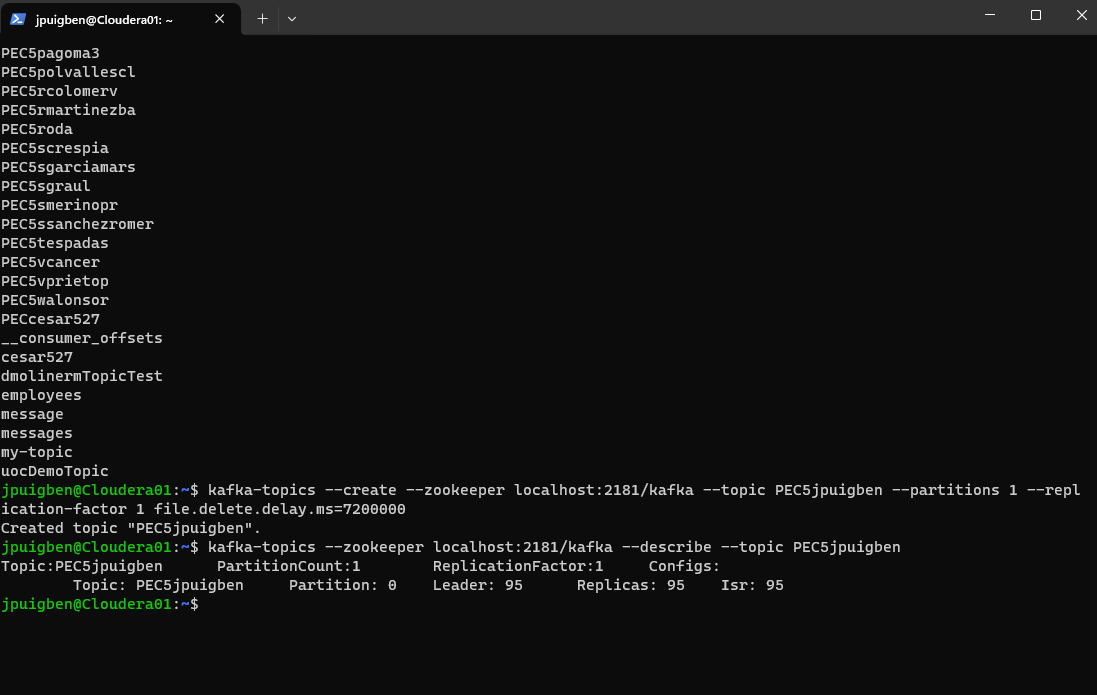

Veiem com tenim una partició i un factor de replicació=1, amb una rèplica.

A més a més, observem altres paràmetres.

En una operació normal, cada partició de Kafka té un "preferred leader", que és la rèplica encarregada de totes les requests de lectura i escriptura de la partició. La metadata del leader està emmagatzemada al Zookeeper o a la metadata del topic, depenent de la configuració.

A més a més veiem que dins de cada partició, hi ha diferents rèpliques i el terme ISR que indica les rèpliques que estan "In-sync", que són les que tenen les mateixes dades que el leader. No és obligatori tenir el mateix valor de ISR que replica, ja que això només passa si la rèplica ha "atrapat" completament al leader als darrers 10 segons.

**Pregunta 5. (1 punt)** Crearem un esdeveniment al tòpic. Recorda que, com la resta de l'activitat, aquesta sentència l'hem d'executar des de la terminal per poder interactuar. Recorda fer `CTRL+c` quan hagis acabat d'enviar missatges.

In [ ]:
#START <FILL IN>
# YOUR CODE HERE
kafka-console-producer --topic PEC5jpuigben --broker-list Cloudera02:9092
#END <FILL IN>

**Pregunta 6. (1 punt)** Finalment, es demana consultar els missatges enviats des del terminal mitjançant el programa consumidor de *tòpics* que incorpora Kafka. Específicament, es demana executar un consumidor connectant als diversos *brokers* existents i indicant el *tòpic* i la partició a la qual s'han enviat. Pots obrir dues terminals i verificar que els missatges que s'envien amb el productor al *broker* es poden consultar amb el consumidor de consola.

In [ ]:
#START <FILL IN>
# YOUR CODE HERE
kafka-console-consumer --bootstrap-server Cloudera02:9092 --topic PEC5jpuigben --partition 0 --from-beginning
#END <FILL IN>

**Pregunta 7. (1 punt)**

Per automatitzar la generació i consum de dades, és habitual treballar mitjançant algun llenguatge de programació, com ara Python, en lloc de fer-ho directament a través de Bash. A continuació, utilitzarem Kafka a través de Python i la llibreria per defecte que **NO HEU D'INSTAL·LAR JA QUE JA ESTÀ DISPONIBLE A LA VERSIÓ CORRECTA**. Podeu trobar tota la documentació associada a l'API proporcionada a [Kafka](https://kafka-python.readthedocs.io/en/master/). Començarem pels conceptes més bàsics que ja hem treballat: escriure en el tòpic que hem creat. Per això configurarem un [Kafka producer](https://kafka-python.readthedocs.io/en/master/apidoc/KafkaProducer.html) que inserirà valors numèrics en un tòpic de Kafka cada 3 segons. Mentre el productor escriu, procedirem a llegir els missatges a l'exercici 8.

Es demana escriure una seqüència numèrica de 300 números (de l'1 al 300) en el tòpic `PEC5<usuari>` de Kafka que acabem de crear. Cadascun dels missatges que escrivim al tòpic ha de contenir informació sobre el tòpic on s'escriu, una clau i el valor binari del valor a escriure (p. ex. value=b'287'). És fonamental revisar l'API associada al [Kafka producer](https://kafka-python.readthedocs.io/en/master/apidoc/KafkaProducer.html) per realitzar els exercicis.

Insistim en l'ús de la llibreria per defecte de Python per accedir a [Kafka](https://kafka-python.readthedocs.io/en/master/), **NO HEU D'INSTAL·LAR-LA JA QUE JA ESTÀ DISPONIBLE LA VERSIÓ CORRECTA**.

**Esquema**
```Python
from kafka import KafkaProducer
import numpy as np
<FILL_IN>
for i in range(1,300):
    <FILL_IN>
producer.flush()
```

In [36]:
#START <FILL IN>
# YOUR CODE HERE
from kafka import KafkaProducer
import numpy as np

producer = KafkaProducer(bootstrap_servers = 'Cloudera02:9092')

for i in range(1,300):
    producer.send('PEC5jpuigben', value=b'msg')
producer.flush()

#END <FILL IN>

**Pregunta 8. (1 punt)**

Mitjançant la biblioteca de Python per a [Kafka](https://kafka-python.readthedocs.io/en/master/), **NO HEU D'INSTAL·LAR-LA JA QUE JA ESTÀ DISPONIBLE LA VERSIÓ CORRECTA**, llegiu els missatges enviats a l'exercici 7 mostrant exclusivament els valors, sense les altres propietats del missatge. És important revisar l'ús de Kafka mitjançant [Python](https://kafka-python.readthedocs.io/en/master/usage.html) i els paràmetres del [Kafka consumer](https://kafka-python.readthedocs.io/en/master/apidoc/KafkaConsumer.html).
**Esquema**
```Python
from kafka import KafkaConsumer
<FILL_IN>
for message in consumer:
    <FILL_IN>
```


In [39]:
#START <FILL IN>
# YOUR CODE HERE

from kafka import KafkaConsumer

consumer = KafkaConsumer('PEC5jpuigben',bootstrap_servers='Cloudera02:9092',
                         value_deserializer=lambda x: loads(x.decode('utf-8')))

for message in consumer:
     print (message.value)
#END <FILL IN>

KeyboardInterrupt: 

# Lectura de dades reals d'OpenSky
## (Puntuació: 30% de l'Activitat Kafka)

En aquesta part de la pràctica treballarem l'adquisició de dades en temps real de [OpenSky](https://opensky-network.org/). OpenSky Network és una associació sense ànim de lucre amb seu a Suïssa que ofereix accés obert a les dades de control de seguiment de vols. Va ser creat com un projecte de recerca per diverses universitats i entitats governamentals amb l'objectiu de millorar la seguretat, la fiabilitat i l'eficiència de l'espai aeri. La seva funció principal és recopilar, processar i emmagatzemar dades de control de trànsit aeri i proporcionar accés obert a aquestes dades al públic. Fonamentalment, les dades dels avions s'obtenen via satèl·lit mitjançant l'Automatic Dependent Surveillance–Broadcast (ADS–B). Per a realitzar aquest exercici, no és necessari registrar-se al sistema OpenSky, ja que realitzarem crides d'informació a baixa freqüència, sobre la superfície d'Espanya cada 10 segons. L'API està disponible a aquest [enllaç](https://openskynetwork.github.io/opensky-api/python.html). El paràmetre bbox és una tupla que indica la latitud mínima, màxima, i les longituds mínimes i màximes.

Primerament, utilitzarem el servei OpenSkyApi per llegir un rectangle amb les latituds i longituds que engloben la península ibèrica.

Per fer-ho, heu de [instal·lar](https://github.com/openskynetwork/opensky-api) la biblioteca al vostre directori del servidor Cloudera.

1. Baixeu el repositori en format .zip.
2. Pugeu el zip al vostre directori personal del servidor de Cloudera.
3. Descomprimeu-lo.
4. Dins del directori que ha creat, executeu `pip install -e ./python`.

Un cop instal·lat el mòdul anterior, la següent cel·la us mostrarà els vols registrats sobre la península ibèrica en aquests moments. Observeu amb deteniment les propietats del diccionari de cada vol.

L'API d'OpenSky té algunes restriccions en el seu ús, podeu consultar-les [aquí](https://openskynetwork.github.io/opensky-api/rest.html#limitations). Aquestes restriccions es limiten a 100 peticions al dia per als usuaris sense registre. En cas que no en tinguin prou per completar els vostres exercicis, heu de registrar-vos en el sistema perquè se us faciliti un usuari i contrasenya.

In [1]:
import json
from random import sample

from opensky_api import OpenSkyApi
#api = OpenSkyApi()
api = OpenSkyApi('<user>', '<password>')

#alternativamente para evitar limitaciones de rate
#api = OpenSkyApi('USUARIO', 'PASSWORD')
states = api.get_states(bbox=(36.173357, 44.024422,-10.137019, 1.736138))
#recuperamos codigo, pais_origen, long, lat, altitud, velocidad, ratio_vertical
#atención en este ejemplo solo estamos mostrando 5 vuelos aleatorios, 
#en vuestros ejercicios deberéis eliminar la función sample
for s in sample(states.states,5):
    vuelo_dict = {
                'callsign':s.callsign,
                'country': s.origin_country,
                'longitude': s.longitude,
                'latitude': s.latitude,
                'velocity': s.velocity,
                'vertical_rate': s.vertical_rate,
            }
    vuelo_encode_data = json.dumps(vuelo_dict, indent=2).encode('utf-8')
    print("(%r, %r,%r, %r, %r, %r)" % (s.callsign, s.origin_country, s.longitude, s.latitude,s.velocity,s.vertical_rate))

ImportError: No module named 'opensky_api'

Sortida d'exemple:

`('BAW457  ', 'United Kingdom',-3.5196, 40.4292, 86.45, 10.73)
('BLX245  ', 'Sweden',-6.0307, 43.8266, 252.51, 0)
('CFG1HE  ', 'Germany',-8.4689, 40.2967, 236.56, 0)
('TOM3MK  ', 'United Kingdom',-7.2687, 41.5878, 247.02, 0)
('AEA57MC ', 'Spain',-0.5364, 38.2791, 64.7, -3.9)`

Ara crearem un programa en Python per enviar un missatge al nostre broker de Kafka cada 10 segons per a cada vol sobre la península ibèrica.

**NOTA**: heu de fer servir el mateix tema que heu utilitzat abans, assegurant-vos que no conté cap missatge anterior. Per evitar que les dades es barregin entre exercicis, podeu esborrar i crear el tema de nou.

**Pregunta 9. (1 punt)** Modifica el programa Python per enviar missatges a Kafka amb les dades dels vols en format JSON. Podeu fer servir la funció [json.dumps](https://docs.python.org/3/library/json.html), que us permet crear una representació JSON de cada diccionari amb les propietats del vol.

Recordeu com heu creat el productor als exercicis anteriors.

In [ ]:
#START <FILL IN>
from time import sleep
import socket
import json
from opensky_api import OpenSkyApi
from kafka import KafkaProducer

#api = OpenSkyApi()

#alternativamente para evitar limitaciones de rate
#api = OpenSkyApi('USUARIO', 'PASSWORD')

api = OpenSkyApi('<user>', '<password>')
producer=KafkaProducer(bootstrap_servers=<FILL IN>)

while True:
    while(True):
        v = {}
        states = api.get_states(bbox=(36.173357, 44.024422,-10.137019, 1.736138))
        if states is not None:
            for vuelo in states.states:
# YOUR CODE HERE
raise NotImplementedError()
                print(v)
                producer.send(<FILL IN>,key=b'UOC', value=bytes(str(v),'utf-8'))
        sleep(10)
        producer.flush() 
#END <FILL IN>

# Video resposta 
## (Puntuació: 40% de l'Activitat Kafka)

En aquest apartat caldrà respondre les qüestions que es mostren a continuació mitjançant una resposta en vídeo d'entre 3 i 5 minuts. Heu de realitzar una gravació en la qual es us vegi la cara mentre responeu amb les vostres pròpies paraules a les qüestions. Heu de seguir els següents punts per fer el vídeo (4 punts):

1. Al principi del vídeo heu de dir el vostre nom i DNI mentre mostreu el DNI (el qual ha de ser visible amb claredat i llegible).

2. Heu de respondre a les preguntes en l'ordre en què estan, comentant sempre a l'inici de cada resposta a quina pregunta us esteu referint.

3. En cas de no respondre a alguna pregunta, heu d'indicar el número de la pregunta a la qual no responeu i el perquè.

# Preguntes:

1. Explica els diferents orígens de dades que permet Apache Flume. Explica, segons el teu criteri, quins són els més habituals i posa un cas d'ús de cadascun d'ells.
2. Familiaritza't amb la comanda avro de la línia de comandament Linux (veure: avro --help). Mostra la informació disponible (esquema, nombre d'elements, etc.) de l'arxiu emmagatzemat a la pregunta 4 dels exercicis de Flume. Comenta la informació en el vídeo. Quines avantatges presenta un format binari com AVRO sobre altres formats textuals?
3. Fes una breu presentació explicant les principals diferències entre Kafka i Flume.
4. Explica quina funcionalitat té el paràmetre 'key' per enviar des del KafkaProducer. Quin efecte té si sempre posem la mateixa clau per a tots els nostres missatges? Hauria de canviar això? Per què?
5. Què és KSQL? Què ens permetria fer?
6. En l'exercici 8 de Kafka heu emmagatzemat diversa informació de vols a Kafka. Explica i mostra com podem consultar aquesta informació.


YOUR ANSWER HERE

### 1. Explica els diferents orígens de dades que permet Apache Flume. Explica, segons el teu criteri, quins són els més habituals i posa un cas d'ús de cadascun d'ells.

A partir de la documentació d'Apache Flume (https://flume.apache.org/releases/content/1.11.0/FlumeUserGuide.html#flume-sources) i altres articles (https://datascientest.com/en/understanding-apache-flume-its-purpose-and-applications) podem mostrar tots els diferents orígens de dades.

- Avro: una de les més habituals, permet la comunicació entre diferents agents dins de Apache Flume
- Thrift Source
- Exec Source
- JMS source
- Spooling Directory Source
- Taildir Source
- Twitter 1%: era una source molt habitual per analitzar els comportaments, les temàtiques, les evolucions... tot i que amb tots els canvis recents
- Kafka source: permet rebre les dades en temps real i missatges generats a pàgines web que recull Kafka i utilitzar-ho com a font de Flume.
- NetCat TCP source
- NetCat UDP source
- Sequence Generatoru Source
- Syslog Sources: permeten capturar events d'un servidor syslos, que és el que centralitza tots els logs de diferents devices.
- HTTP sources: permet "traduir" requests del tipus POST i GET
- Stress Sources
- Custom source
- Scribe source

### 2. Familiaritza't amb la comanda avro de la línia de comandament Linux (veure: avro --help). Mostra la informació disponible (esquema, nombre d'elements, etc.) de l'arxiu emmagatzemat a la pregunta 4 dels exercicis de Flume. Comenta la informació en el vídeo. Quines avantatges presenta un format binari com AVRO sobre altres formats textuals?

### 3. Fes una breu presentació explicant les principals diferències entre Kafka i Flume.

Kafka és un sistema de missatgeria productor/subscriptor de propòsit general. No està específicament dissenyat per a entorns big data, encara que és àmpliament utilitzat en aquests entorns gràcies a les seves característiques i a la seva robustesa. Per altra banda, Flume és part de l'ecosistema Hadoop i s'usa per recopilar, agregar i moure eficientment grans quantitats de dades a un emmagatzematge de dades com HDFS, S3 o HBase.

Ambdós sistemes estan pensats per a un nombre diferent d'accessos concurrents. Augmentar el nombre de consumidors en Kafka és molt senzill i no afecta el rendiment. En canvi, augmentar el nombre de consumidors en Flume implica canviar-ne la topologia i també genera indisponiblitat en el sistema.

Quant a la replicació i la tolerància a les fallades, els dos sistemes asseguren la tolerància a les fallades, però Kafka replica els esdeveniments en el seu clúster, mentre que Flume no ho fa. En aquest cas, Kafka és molt més robust
a les caigudes parcials del sistema.

En general, utilitzarem Flume quan treballem amb dades no relacionals i les vulguem ingressar en un ecosistema Hadoop. Kafka té un propòsit general i és que pot ser utilitzat o no en entorns big data i és especialment útil quan volem connectar múltiples sistemes.

L'ús més habitual de Flume és llegir en temps real informació de diferents fonts, com les xarxes socials (Twitter, Facebook…), els logs de pàgines web, de processos i servidors, així com tot tipus de fitxers i, després, portar aquesta
informació a Hadoop (HDFS, Hive, HBase…) per processar i analitzar aquestes dades.

Kafka té un ús més obert, ja que pot fer-se servir com a cua de missatgeria entre els serveis d'una arquitectura de microserveis. Un altre ús clàssic és el d'eina de monitoratge amb la qual es recullen logs de diversos sistemes dins d'una aplicació, agregant-los i centralitzant-los per a un processament posterior. Kafka, com veurem amb l'arquitectura Kappa, fins i tot pot ferse servir com a mecanisme de storage, ja que és capaç d'emmagatzemar gran quantitat de dades.

### 4. Explica quina funcionalitat té el paràmetre 'key' per enviar des del KafkaProducer. Quin efecte té si sempre posem la mateixa clau per a tots els nostres missatges? Hauria de canviar això? Per què?

És un paràmetre utilitzat per particionar. Per defecte Kafka confia en la key per decidir a quina partició escriure. En cas de 2 registres amb la mateixa key, el producer sempre escollirà la mateixa partició.  

És important en casos on s'han d'entregar als usuaris els registres en un ordre concret, per exemple si un usuari compra a un ecommerce i després cancel·la la compra i rep la cancel·lació abans de que es creii la ordre de compra...

Si sempre és el mateix key voldrà dir que no hi ha partició

### 5. Què és KSQL? Què ens permetria fer?

Confluent KSQL és el motor de streaming que permet processar dades en real-time amb Kafka amb la mateixa senzillesa i familiaritat de construir aplicacions tradicionals a bases de dades relacionals. 

Proporciona un us senzill i una interfàs poderosa per processar stream en Kafka sense la necessitat d'escriure codi en Python o Java, només amb línies SQL. És escalable, elàstic, tolerant a fallades i soporta un ampli ventall d'operacions en streaming tals com filtratge, transformacions, agregacions, joins... 

### 6. En l'exercici 8 de Kafka heu emmagatzemat diversa informació de vols a Kafka. Explica i mostra com podem consultar aquesta informació.
